# run_201808080511

論文及び、[NLPLearn/QANet](https://github.com/NLPLearn/QANet)のExact Matchになかなか追いつかず、根本原因になかなか辿り着けなかったため、色々と修正した。もともとは論文と実装が異なっている部分についてはNLPLearn/QANetを参考にしていなかったが、結果として現状はNLPLearn/QANetの構造をほぼ踏襲している。

14k stepまで動かして、NLPLearn/QANetとほぼ同じEMまで辿り着くことができた。(EMの値が低かった一番の根本原因は評価用のスクリプトの間違いだった)

## TODO

* プログラムの整理
* 60 stepまで動かして、EMがさらに増加するか確認する
  - NLPLearn/QANetと比べて正則化の処理が抜けている部分があるためもしかしたら過学習するかもしれない
* 省メモリ化
  - GTX 1080で動かせるようにしたい
* 高速化、原因が分からないがNLPLearn/QANetと比べてスピードが劣る

---

## 結果の詳細

* commit: bed101dd5255b8bbc7390f2674f703bf628b543c
* 前処理済データ： [preprocessed_z_with_dev_data_201808080458.tar.gz](https://s3.amazonaws.com/taiwa-eqa/qanet/preprocessed_z_with_dev_data_201808080458.tar.gz)

ハイパーパラメータ：

In [1]:
import json

with open('./logs/201808080511/hparams.json') as f:
    print(json.dumps(json.load(f), indent=2))

{
  "char_vocab_size": 1178,
  "embedding_encoder_filter_size": 7,
  "embedding_encoder_num_blocks": 1,
  "layer_dropout_survival_prob": 0.9,
  "warmup_steps": 1000,
  "char_emb_dim": 64,
  "epochs": 100,
  "batch_size": 32,
  "max_word_length": 16,
  "model_encoder_num_blocks": 7,
  "model_encoder_num_heads": 8,
  "num_gpus": 2,
  "dropout_rate": 0.05,
  "dim": 128,
  "max_context_length": 400,
  "char_dim": 128,
  "learning_rate": 0.001,
  "model_encoder_filter_size": 5,
  "max_question_length": 30,
  "char_dropout_rate": 0.1,
  "embedding_encoder_num_heads": 8,
  "max_grad_norm": 5.0,
  "word_dropout_rate": 0.1,
  "model_encoder_num_conv_layers": 2,
  "char_conv_filter_size": 5,
  "highway_num_layers": 2,
  "embedding_encoder_num_conv_layers": 4,
  "word_emb_dim": 300,
  "ema_decay": 0.9999,
  "l2_regularizer_scale": 3e-07
}


dev-v1.1.jsonに対する評価結果：

```
{"exact_match": 61.778618732261116, "f1": 73.14790944574884}
```

In [2]:
%matplotlib inline

import os
import sys

root_dir = os.path.join(os.getcwd(), "..", "../")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from IPython.core.pylabtools import figsize
from plot_util import plot_perplexity

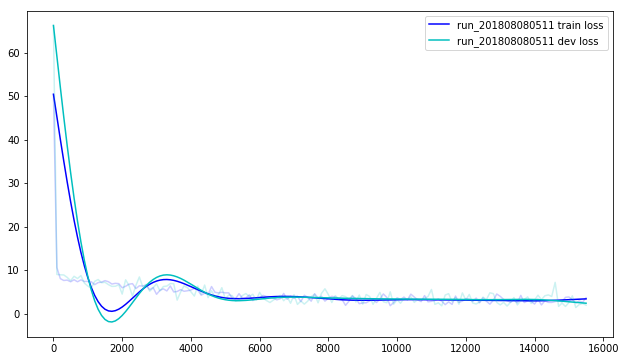

In [3]:
figsize(10.5, 6)

plot_perplexity(
    ('run_201808080511 train loss', './logs/201808080511/run_201808080511_train_loss.csv'),
    ('run_201808080511 dev loss', './logs/201808080511/run_201808080511_dev_loss.csv'),
    log=False)

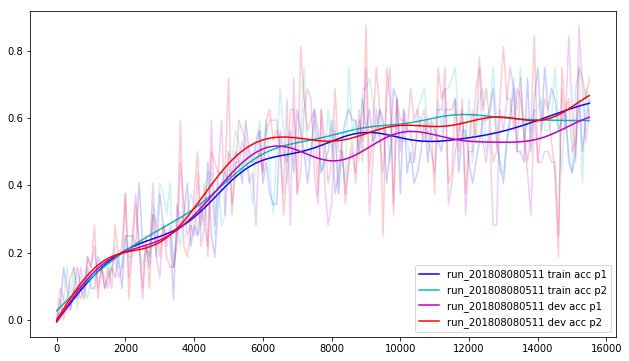

In [4]:
figsize(10.5, 6)

plot_perplexity(
    ('run_201808080511 train acc p1', './logs/201808080511/run_201808080511_train_acc_p1.csv'),
    ('run_201808080511 train acc p2', './logs/201808080511/run_201808080511_train_acc_p2.csv'),
    ('run_201808080511 dev acc p1', './logs/201808080511/run_201808080511_dev_acc_p1.csv'),
    ('run_201808080511 dev acc p2', './logs/201808080511/run_201808080511_dev_acc_p2.csv'),
    log=False)